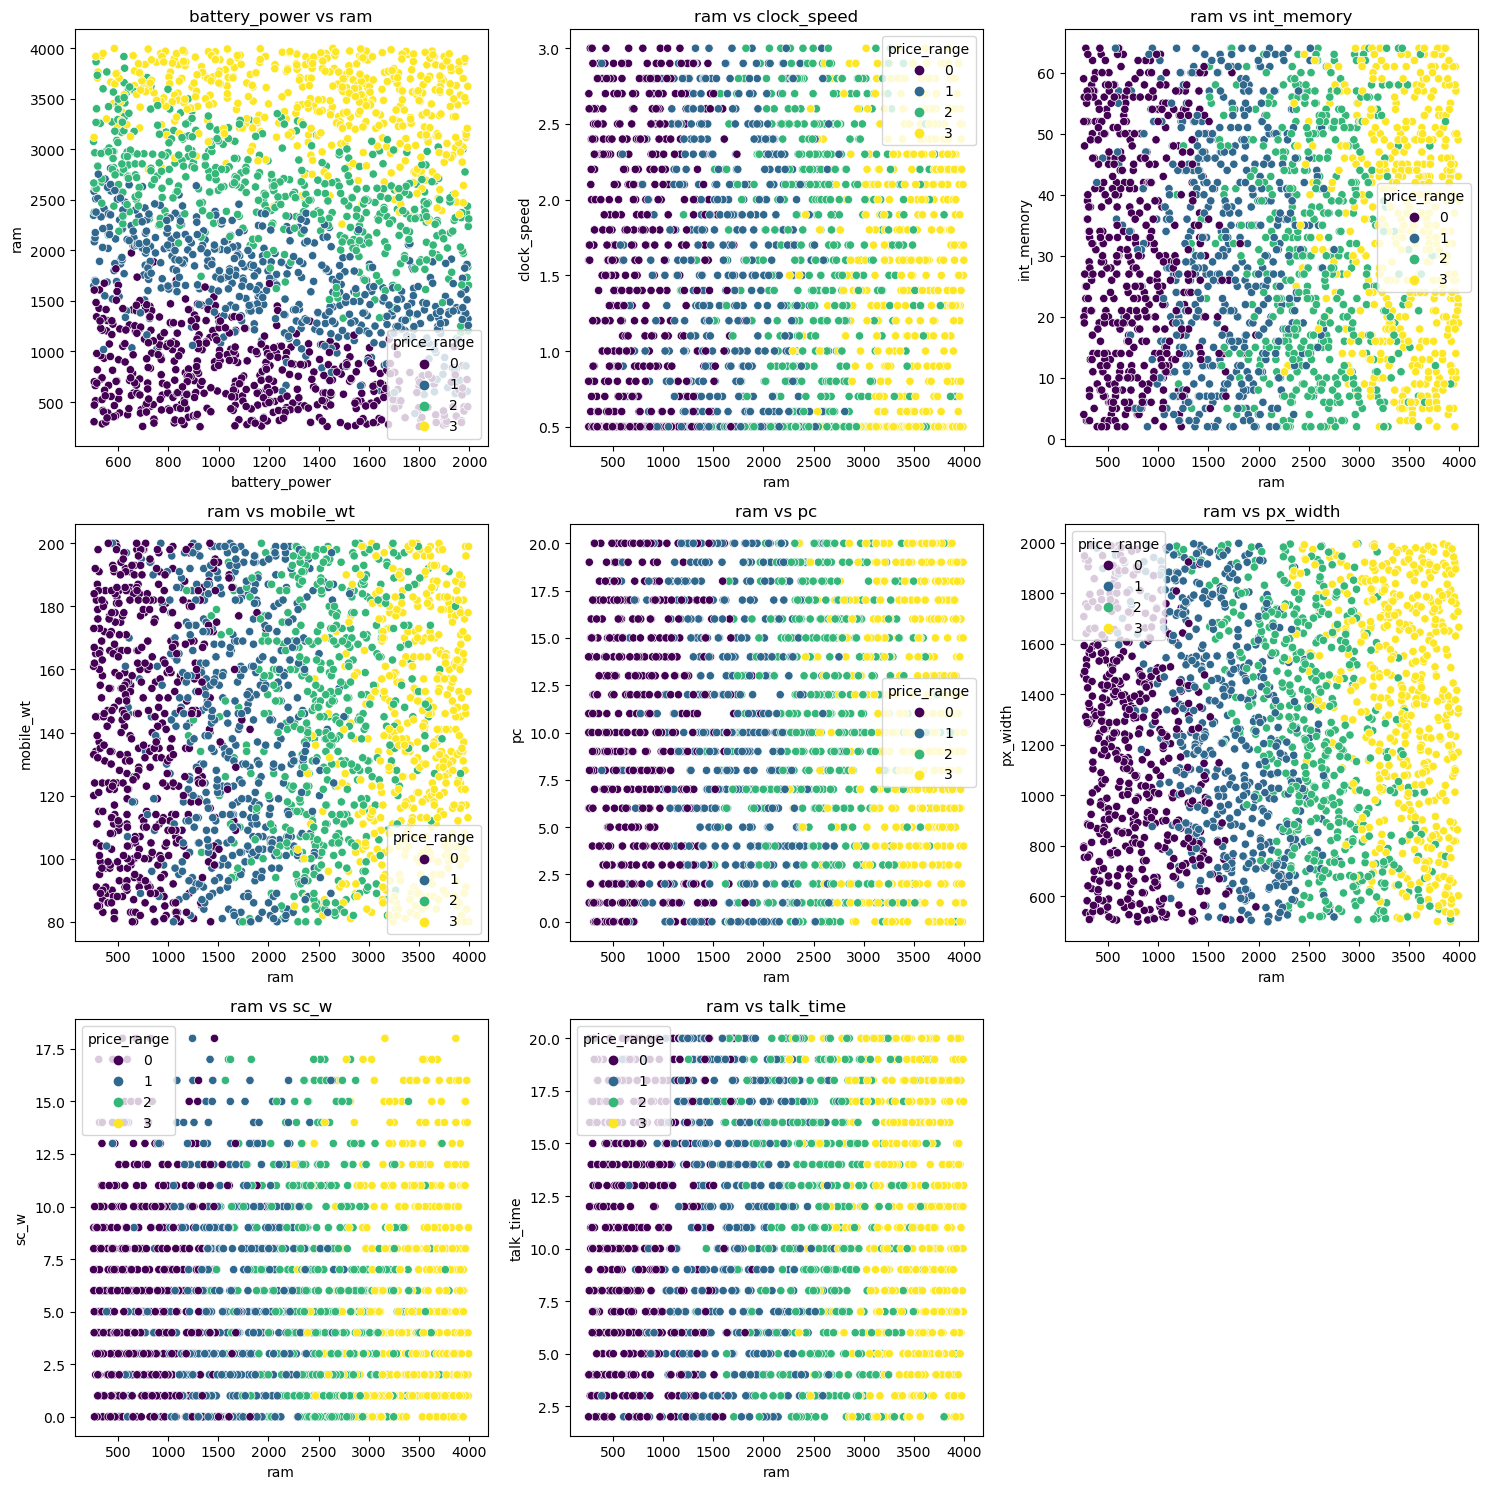

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv') 

# Display the first few rows of the dataset to understand its structure
df.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Pairs of attributes for scatter plots as per the notebook
pairs = [
    ('battery_power', 'ram'),
    ('ram', 'clock_speed'),
    ('ram', 'int_memory'),
    ('ram', 'mobile_wt'),
    ('ram', 'pc'),
    ('ram', 'px_width'),
    ('ram', 'sc_w'),
    ('ram', 'talk_time')
]

# Generate scatter plots for the specified pairs
plt.figure(figsize=(15, 15))
for i, pair in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue="price_range", palette="viridis")
    plt.title(f'{pair[0]} vs {pair[1]}')

plt.tight_layout()
plt.show()


/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


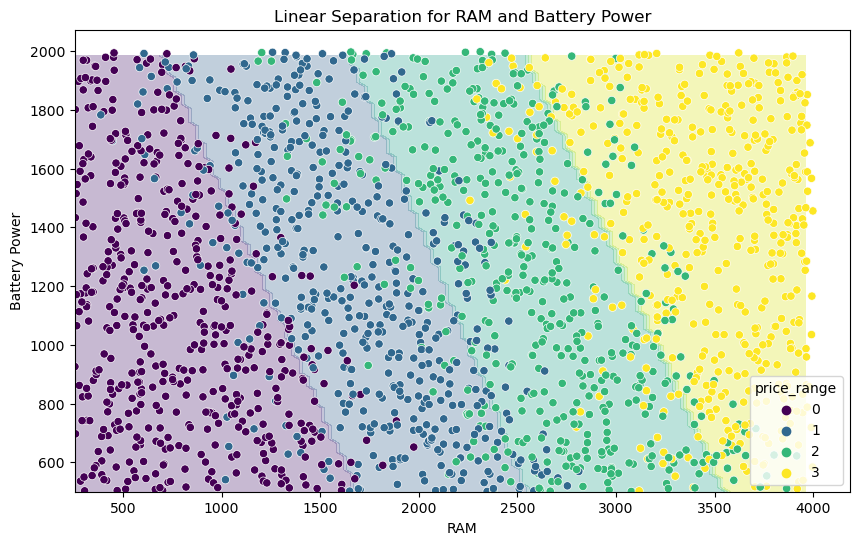

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Focusing on 'ram' and 'battery_power' for linear separation
features = ['ram', 'battery_power']
X = df[features]
y = df['price_range']

# Create a logistic regression model for linear separation
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X['ram'].min() - 1, X['ram'].max() + 1
y_min, y_max = X['battery_power'].min() - 1, X['battery_power'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                     np.arange(y_min, y_max, (y_max - y_min) / 100))

# Predict over the mesh
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape for the plot
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(data=df, x='ram', y='battery_power', hue="price_range", palette="viridis")
plt.title('Linear Separation for RAM and Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.show()


/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/lin

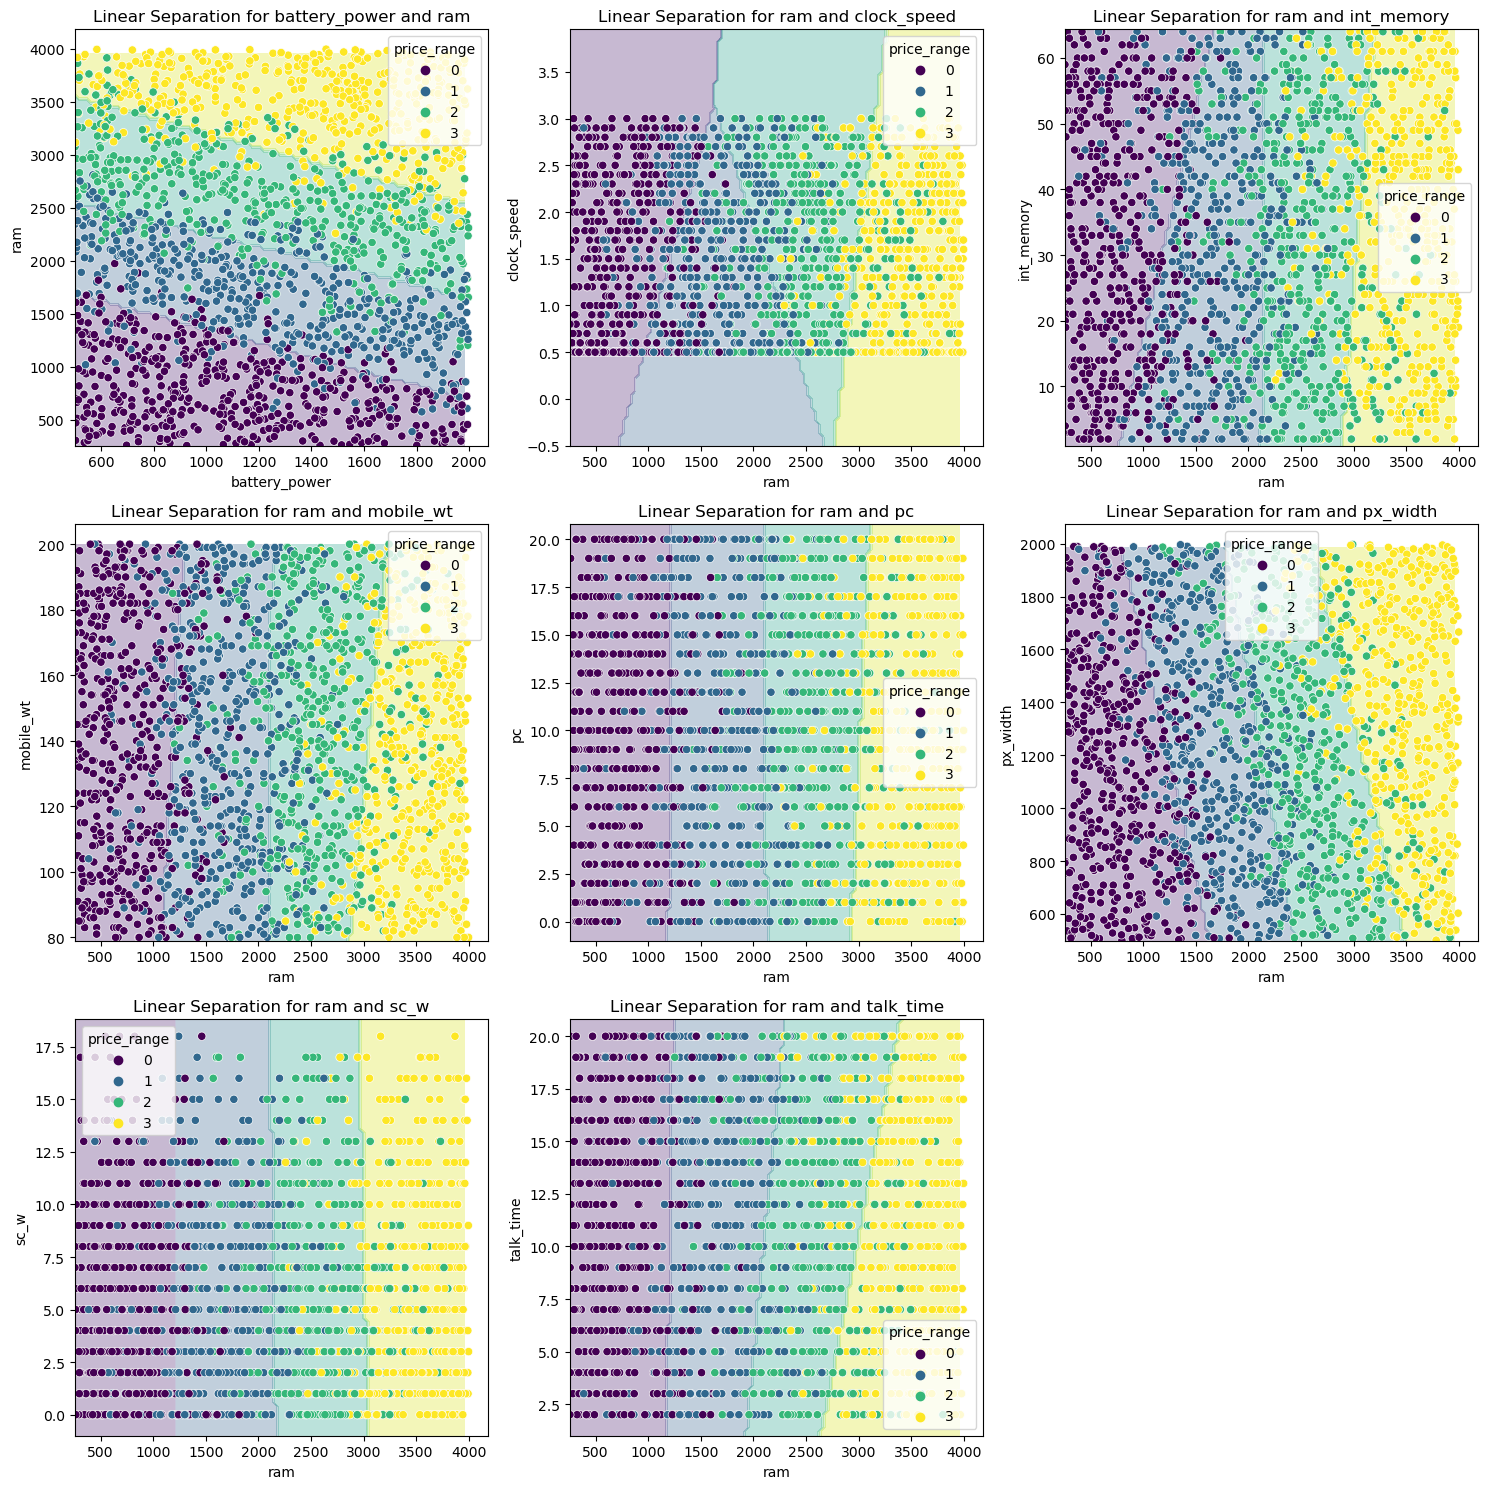

In [5]:
# Function to create logistic regression model and decision boundary for a pair of features
def plot_decision_boundary(pair):
    # Extract features and target
    X = df[list(pair)]
    y = df['price_range']

    # Create and fit logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    # Create a mesh to plot the decision boundaries
    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                         np.arange(y_min, y_max, (y_max - y_min) / 100))

    # Predict over the mesh
    Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue="price_range", palette="viridis")
    plt.title(f'Linear Separation for {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

# Generate plots for all pairs
plt.figure(figsize=(15, 15))
for i, pair in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    plot_decision_boundary(pair)

plt.tight_layout()
plt.show()
